# Problem 1
Neural networks are trained and tested with different datasets to make sure that the networks can actually
deal with new data and not just data it has already seen. If the label of a tested image corresponds to the
largest entry of the output vector, the image has been correctly classified by the network. The fraction of
correctly classified test images is a measure for the network’s performance.

a) Loading the MNIST npy files provided in the shared folder.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

2024-02-07 16:17:43.581941: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-07 16:17:43.610507: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-07 16:17:43.610535: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-07 16:17:43.611162: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-07 16:17:43.615287: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-07 16:17:43.615603: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
# a) Load MNIST datasets
data_train = np.load('/mnt/share/nnds/mnist/mnistDataTrain.npy')
labels_train = np.load('/mnt/share/nnds/mnist/mnistLabelsTrain.npy')

data_test = np.load('/mnt/share/nnds/mnist/mnistDataTest.npy')
labels_test = np.load('/mnt/share/nnds/mnist/mnistLabelsTest.npy')

b) Creating a network with 784 input nodes, 100 hidden nodes, 10 output nodes and a learning rate of 0.6 and training the network with all 60000 images of the dataTrain dataset.

In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # 28 x 28 = 784 input nodes
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

2024-02-07 16:17:50.700347: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-07 16:17:50.700921: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [4]:
lr = 0.6

In [5]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=lr),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Defining a function for plotting the model to compare trained and initial model's weight matrices.

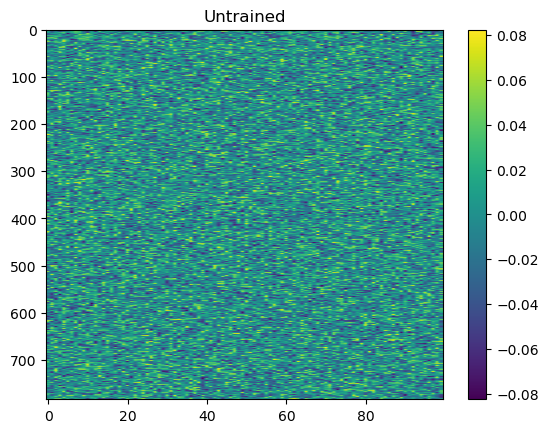

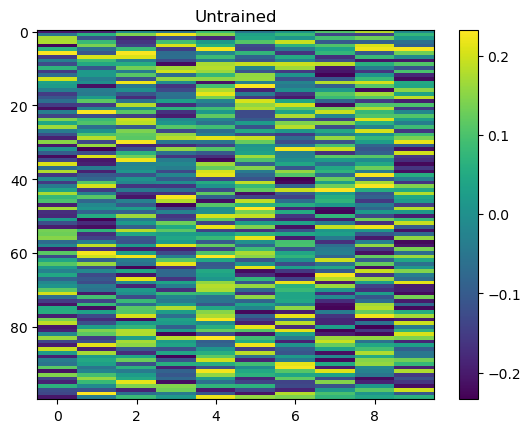

In [6]:
def plot_weights(model, title):
    for layer in model.layers:
        if isinstance(layer, tf.keras.layers.Dense):
            weights, _ = layer.get_weights()
            plt.imshow(weights, cmap='viridis', aspect='auto')
            plt.colorbar()
            plt.title(title)
            plt.show()

plot_weights(model, 'Untrained')

In [7]:
# training the model
model.fit(data_train, labels_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2381 - accuracy: 0.9266
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1156 - accuracy: 0.9658
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0919 - accuracy: 0.9720
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0776 - accuracy: 0.9763
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0605 - accuracy: 0.9808
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0547 - accuracy: 0.9823
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0510 - accuracy: 0.9840
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0410 - accuracy: 0.9868
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0387 - accuracy: 0.9880
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.029

c) was omitted in the question sheet ;)

d) Writing a function or a method evaluate that determines the fraction of dataTest images that the
network classifies correctly.

In [8]:
def evaluate(model, x_test, y_test):
    predictions = model.predict(x_test)
    correct_predictions = np.sum(np.argmax(predictions, axis=1) == y_test)
    total_images = len(y_test)
    accuracy = correct_predictions / total_images
    return accuracy

In [9]:
# evaluating the model
test_accuracy = evaluate(model, data_test, labels_test)
print(f"Test Accuracy: {test_accuracy}")

313/313 [==============================] - 0s 443us/step
Test Accuracy: 0.9733


The network's great performance is shown in its accuracy of 97.33 % on test data.

e) Now showing the updated weight matrix of the trained model.

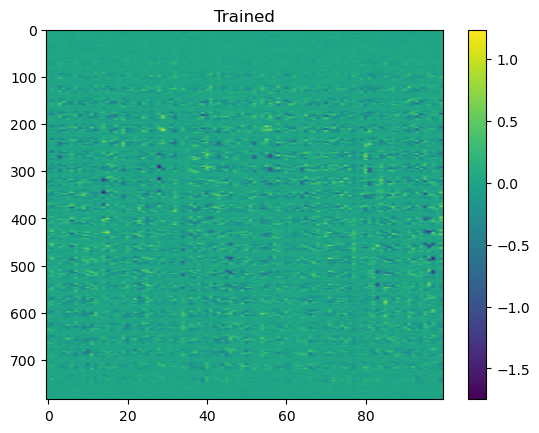

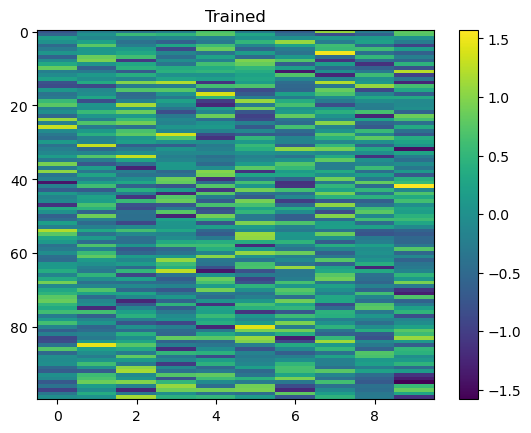

In [10]:
plot_weights(model, 'Trained')

The weights in the plot have taken a more defined pattern.

# Problem 2
Training large neural network can be a very long process. Therefore, we need a method to permanently save
and restore a network’s memory.

Using OOP to create a class with `saveWeights` and `restoreWeights` methods as requested in a) and b).

In [11]:
from nn import neuralNetwork
from PIL import Image

c) Creating an instance of the network testNet, training it, save the network’s weights, setting them to 0 and
restoring them again. And lastly, verifying that your network is able to classify handwritten numbers again.

In [12]:
def recognize_handwriting(gif_path, neural_network):
    # Load the GIF file
    digit_image = Image.open(gif_path)

    # Convert the image to grayscale
    digit_image = digit_image.convert("L")

    # Resize the image to match the input size of your neural network (assuming 28x28 pixels)
    resized_image = digit_image.resize((28, 28))

    # Convert the image to a numpy array
    image_array = np.array(resized_image)

    # Normalize the pixel values to be in the range [0, 1]
    normalized_image = image_array / 255.0

    # Invert the pixel values (assuming your training data was preprocessed in the same way)
    inverted_image = 1.0 - normalized_image

    # Flatten the image array to match the input size of your neural network
    flattened_image = inverted_image.flatten()

    # Query the neural network with the flattened image
    prediction = neural_network.query(flattened_image)

    # Get the predicted label
    predicted_label = np.argmax(prediction)

    return predicted_label

In [15]:
input_nodes = 784
hidden_nodes = 100
output_nodes = 10
learning_rate = 0.6

testNet = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

# Training the network
n = len(labels_train)

for idx in range(n):
    lbl = labels_train[idx] # Get the label of the first image

    target = np.zeros(10, dtype='float') + 0.01 # Set the target vector
    target[lbl] = 0.99

    testNet.train(data_train[idx,:,:], target)

# Saving the weights
testNet.saveWeights()

prediction = recognize_handwriting("eight.gif", testNet)
print("Trained neural network recognizing hand written digit 8 as:", prediction)

# Setting the weights to 0
testNet.wih = np.zeros_like(testNet.wih)
testNet.who = np.zeros_like(testNet.who)

prediction = recognize_handwriting("eight.gif", testNet)
print("Cleared weights neural network recognizing hand written digit 8 as:", prediction)

# Restoring the weights
testNet.restoreWeights()
prediction = recognize_handwriting("eight.gif", testNet)
print("Restored weights neural network recognizing hand written digit 8 as:", prediction)

Trained neural network recognizing hand written digit 8 as: 8
Cleared weights neural network recognizing hand written digit 8 as: 0
Restored weights neural network recognizing hand written digit 8 as: 8


Verified.